# Laboratorio 5: medidas de desempeño en ML

### Parte I. 
**Programa, sin bibliotecas, las funciones para calcular las siguientes medidas de desempeño:**

1. Accuracy
2. Error. 

**Programa un método para calcular la matriz de confusión en datasets con dos clases y a partir de ésta calcula    las siguientes medidas.**

-Precision,

-Recall,

-Positive Predictive Value,

-True Positive Rate,

-True Negative Rate,

-False Positive Rate,

-False Negative Rate,

-F1-Score.

### parte I

In [83]:
def confusion_matrix2(true, pred):
    # Identificamos las clases únicas
    classes = sorted(set(true + pred))  # Ordenamos las clases para mantener el orden ascendente
    num_classes = len(classes)
    
    # Creamos la matriz de confusión 
    mat = np.zeros((num_classes, num_classes))
    
    # Creamos un mapeo de las clases a índices (por si las clases no empiezan en 0 o 1)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    
    # Recorremos las etiquetas verdaderas y predichas al mismo tiempo
    for t, p in zip(true, pred):
        true_idx = class_to_index[t]    # Índice de la clase verdadera
        pred_idx = class_to_index[p]    # Índice de la clase predicha
        mat[true_idx, pred_idx] += 1    # Actualizamos la matriz de confusión
    
    return mat 

#ejemplo de implementación de la matriz: 

true = [1, 0, 1, 1, 0, 0, 1]  # etiquetas verdaderas
predicted = [1, 0, 1, 0, 0, 1, 1]  # etiquetas predichas

conf=confusion_matrix2(true, predicted)
print(conf)

[[2. 1.]
 [1. 3.]]


In [81]:
def calculate_tp_tn_fp_fn(conf_matrix):
    # Asegurarnos que conf_matrix es un array de numpy
    if not isinstance(conf_matrix, np.ndarray):
        raise ValueError("conf_matrix debe ser un array de numpy")

    num_classes = conf_matrix.shape[0]  # Número de clases
    tp = np.zeros(num_classes)
    tn = np.zeros(num_classes)
    fp = np.zeros(num_classes)
    fn = np.zeros(num_classes)
    
    # Calcular TP, TN, FP, FN para cada clase
    for i in range(num_classes):
        tp[i] = conf_matrix[i, i]  # True Positives para la clase i, la diagonal
        
        # False Positives para la clase i: suma de la columna i excepto el valor diagonal
        fp[i] = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        
        # False Negatives para la clase i: suma de la fila i excepto el valor diagonal
        fn[i] = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
        
        # True Negatives para la clase i: suma de todos los elementos fuera de la fila i y la columna i
        tn[i] = np.sum(conf_matrix) - (tp[i] + fp[i] + fn[i])
    
    # Sumamos los valores de TP, TN, FP, FN para obtener el total
    return sum(tp), sum(tn), sum(fp), sum(fn)

# Calcular TP, TN, FP, FN
tp, tn, fp, fn = calculate_tp_tn_fp_fn(conf)
print("fp:",fp,"tn",tn,"fp:",fp,"fn", fn, "\n")


# Calcular métricas 

num_classes = conf.shape[0]  # Número de clases
accuracy = (tp + tn) / (tp + tn + fp + fn)
error= 1-accuracy
precision= tp/(tp+fp)
recall= tp/(tp+fn)
ppv= tp/(tp+fp)
tpr= tp/(tp+fn)
tnr= tn/(tn+fp)
fpr= fp/(fp+tn)
fnr= fn/(fn+tp)
f1= (2*tp)/(2*tp+fp+fn)
print(f"Classes: {num_classes:.1f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error: {error:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"TPR: {tpr:.4f}")
print(f"TNR: {tnr:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"FNR: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

fp: 2.0 tn 5.0 fp: 2.0 fn 2.0 

Classes: 2.0
Accuracy: 0.7143
Error: 0.2857
Precision: 0.7143
Recall: 0.7143
PPV: 0.7143
TPR: 0.7143
TNR: 0.7143
FPR: 0.2857
FNR: 0.2857
F1 score: 0.7143


### Parte II.

Investiga, y en su caso ejemplifica, si las medidas descritas anteriormente están disponibles en alguna biblioteca de Python y proporciona un ejemplo. 

Ejemplo: se trabajará con el dataset "Titanic - Machine Learning from Disaster" el cual solo maneja 2 clases (si una persona sobrevivió o no, dependiendo sus características). 

En este caso **sklearn** nos permite importar dichas métricas e implementarlas de forma sencilla, posteriormente utilizaremos matplotlib y seaborn para graficar la matriz de confusión. 

Para el ejemplo usaremos Random Forest como clasificador. 

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cargar el dataset Titanic
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocesamiento básico (puedes agregar más limpieza y procesamiento)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Reemplazar valores faltantes de 'Age' 
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Reemplazar valores faltantes de 'Embarked' 
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Reemplazar valores faltantes de 'Fare' 
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

# Características a seleccionar
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cálculos adicionales
TN, FP, FN, TP = conf_matrix.ravel()

# True Positive Rate (TPR) o Sensitivity
tpr = TP / (TP + FN)

# True Negative Rate (TNR) o Specificity
tnr = TN / (TN + FP)

# False Positive Rate (FPR)
fpr = FP / (FP + TN)

# False Negative Rate (FNR)
fnr = FN / (FN + TP)

# Error Rate
error_rate = 1 - accuracy

# Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print(f"Error: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"TPR: {tpr}")
print(f"TNR: {tnr}")
print(f"FPR: {fpr}")
print(f"FNR: {fnr}")
print(f"PPV: {ppv}")


Accuracy: 0.7988826815642458
Error: 0.2011173184357542
Precision: 0.7638888888888888
Recall: 0.7432432432432432
F1-Score: 0.7534246575342466
TPR: 0.7432432432432432
TNR: 0.8380952380952381
FPR: 0.1619047619047619
FNR: 0.25675675675675674
PPV: 0.7638888888888888


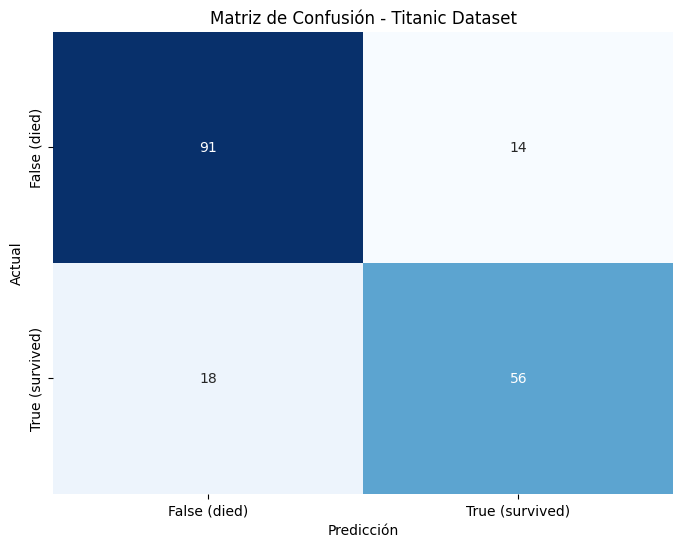

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["False (died)", "True (survived)"], 
            yticklabels=["False (died)", "True (survived)"])

plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Titanic Dataset')
plt.show()